In [1]:
import numpy as np
import pandas as pd
import sys
from iminuit import Minuit

In [2]:
sys.path.append("../../../../../") #Sorry about this one /Asbjørn
import myfuncs as my
my.init_plotting()
save = my.plot_saving("../Report/figures/",save=True).saveplot

In [3]:
output_data = pd.read_csv("output_data.txt",sep="\\s+")
output_data_Amdahl = pd.read_csv("output_data_Amdahl.txt",
                                 sep="\\s+",header=None,
                                names = output_data.columns)

In [4]:
output_data.sort_values(by=["version","nthreads"])
output_data_Amdahl.sort_values(by=["version","nthreads"])

,Wave_zero_point,coeff_1,coeff_2,coeff_3,coeff_4,t_fft,t_no_fft,t_total,nfreq,nthreads,version,checksum
58,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.532,17.6600,19.200,1048576.0,1.0,1.0,23.291276
78,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.520,8.9220,10.440,1048576.0,2.0,1.0,23.291276
52,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.524,8.2110,9.735,1048576.0,4.0,1.0,23.291276
73,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.539,3.6590,5.199,1048576.0,6.0,1.0,23.291276
76,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.521,2.7620,4.283,1048576.0,8.0,1.0,23.291276
...,...,...,...,...,...,...,...,...,...,...,...,...
38,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.378,0.4453,1.823,1048576.0,54.0,3.0,23.291276
68,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.365,0.4070,1.772,1048576.0,58.0,3.0,23.291276
69,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.377,0.3790,1.756,1048576.0,60.0,3.0,23.291276
17,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.372,0.3682,1.740,1048576.0,62.0,3.0,23.291276


In [5]:
def amdahl(N,a,s):
    return a/(s+(1-s)/N)

def _least_squares(x,y,a,s):
    ymod = amdahl(x,a,s)
    return np.sum((ymod-y)**2)

def least_squares_v(v):
    mask = output_data_Amdahl["version"] == v
    data = output_data_Amdahl.where(mask).dropna(axis=0)
    return lambda a,s: _least_squares(data["nthreads"].to_numpy(), data["t_total"].max()/data["t_total"].to_numpy(), a ,s)
    
v1_min = Minuit(least_squares_v(1), a = 1, s = 0.09)
v1_min.limits["a"] = 0.01,None
v1_min.fixed["a"] = False
display(v1_min.migrad())
a1,s1 = v1_min.values[:]

v2_min = Minuit(least_squares_v(2), a = 1, s = 0.09)
v2_min.limits["a"] = 0.01,None
v2_min.fixed["a"] = False
display(v2_min.migrad())
a2,s2 = v2_min.values[:]

v3_min = Minuit(least_squares_v(3), a = 1, s = 0.09)
v3_min.limits["a"] = 0.01,None
v3_min.fixed["a"] = False
display(v3_min.migrad())
a3,s3 = v3_min.values[:]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.8799                     │              Nfcn = 52               │
│ EDM = 6.11e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.82    │   0.10    │            │            │  0.01   │         │       │
│ 1 │ s    │   0.066   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │   0.0111  1.27e-3 │
│ s │  1.27e-3 0.000149 │
└───┴───────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.799                      │              Nfcn = 72               │
│ EDM = 2.62e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.94    │   0.08    │            │            │  0.01   │         │       │
│ 1 │ s    │   0.049   │   0.007   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │  0.00659  0.53e-3 │
│ s │  0.53e-3 4.33e-05 │
└───┴───────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.6847                     │              Nfcn = 52               │
│ EDM = 4.04e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.89    │   0.10    │            │            │  0.01   │         │       │
│ 1 │ s    │   0.065   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │   0.0107  1.11e-3 │
│ s │  1.11e-3 0.000118 │
└───┴───────────────────┘

In [6]:
least_squares_v(1)(0.04,0.07)

1847.9423710219373

In [7]:
import matplotlib.pyplot as plt

In [8]:
for d in my.cc+my.mc:
    print(d)

{'color': '#f76462', 'marker': 'o'}
{'color': '#f40b1e', 'marker': '^'}
{'color': '#459da1', 'marker': 's'}
{'color': '#1762df', 'marker': 'H'}
{'color': '#002e7b', 'marker': 'D'}
{'color': '#9f80ec', 'marker': '*'}
{'color': '#0b000c', 'marker': '>'}
{'color': '#540212', 'marker': 'p'}


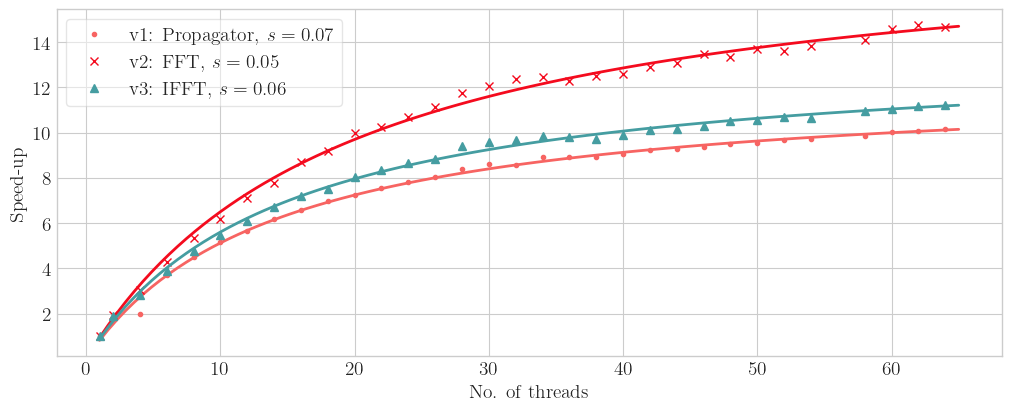

In [9]:
fig, ax = my.standard_plot()
markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
fit_pars = [[a1,s1],[a2,s2],[a3,s3]]
Ns = np.linspace(1,65,100)
for i in range(3):
    version = i+1
    data = output_data_Amdahl.where(output_data_Amdahl["version"] == version)
    time = data["t_total"]
    data_points, = ax.plot(data["nthreads"], time.max()/time, markers[i],
                           label=f"v{int(version)}: {changes[i]}, $s={fit_pars[i][1]:.2f}$")
    ax.plot(Ns,amdahl(Ns,*fit_pars[i]),color = data_points.get_color())

ax.set(xlabel="No. of threads", ylabel="Speed-up")
ax.legend() 
save(fig, "amdahl.pdf")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.72                      │              Nfcn = 29               │
│ EDM = 5.81e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.382   │   0.018   │            │            │         │         │       │
│ 1 │ b    │    1.7    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000317 -5.75e-3 │
│ b │ -5.75e-3    0.247 │
└───┴───────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.13                      │              Nfcn = 27               │
│ EDM = 3.07e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.543   │   0.018   │            │            │         │         │       │
│ 1 │ b    │    1.3    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000317 -5.75e-3 │
│ b │ -5.75e-3    0.247 │
└───┴───────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.57                      │              Nfcn = 27               │
│ EDM = 5.85e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.433   │   0.018   │            │            │         │         │       │
│ 1 │ b    │    1.6    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000317 -5.75e-3 │
│ b │ -5.75e-3    0.247 │
└───┴───────────────────┘

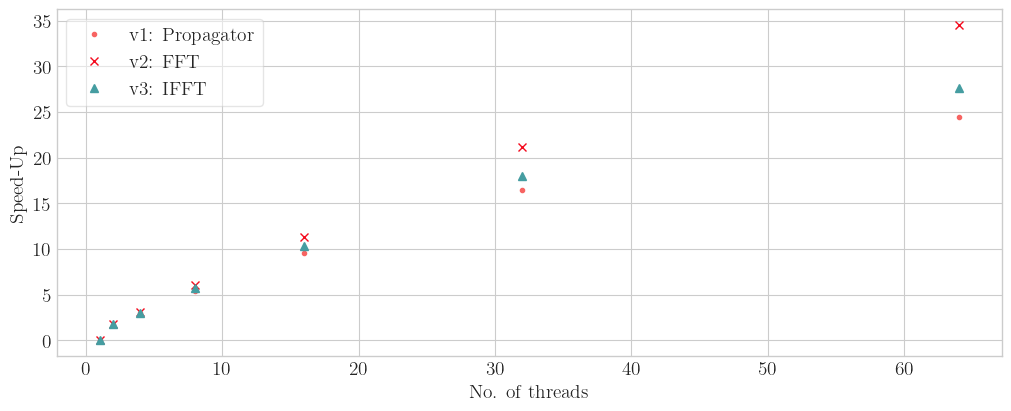

In [21]:
def lin_least_sq(x,y):
    return lambda a,b: np.sum((a*x+b-y)**2)

fig, ax = my.standard_plot()

markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
for i in range(3):
    version = i+1
    vmask = output_data["version"] == version
    data = output_data.where(vmask)
    time = output_data["t_total"].where(vmask)
    nfreq = output_data["nfreq"].where(vmask)
    
    speed_up = (time.min() / nfreq.min() )  / (time / nfreq )
    speed_up = (time.min() )  / (data["t_no_fft"] + data["t_fft"]/np.log(data["nthreads"])) * data["nthreads"]
    x,y = data["nthreads"].dropna(axis=0).to_numpy(),speed_up.dropna(axis=0).to_numpy()
    min = Minuit(lin_least_sq(x,y), a= 0.5,b=0)
    display(min.migrad())
    
    ax.plot(output_data["nthreads"].where(vmask),
            speed_up, markers[i], label=f"v{int(version)}: {changes[i]}")

ax.set(xlabel="No. of threads", ylabel="Speed-Up")
ax.legend() 

save(fig, "weak_scaling_corrected.pdf")

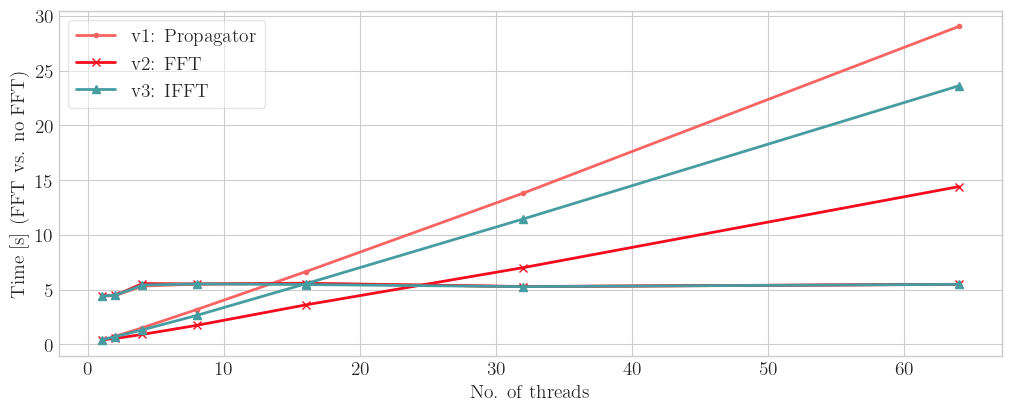

In [14]:
fig, ax = my.standard_plot()

markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
for i in range(3):
    version = i+1
    vmask = output_data["version"] == version
    data = output_data.where(vmask).sort_values(by=["nthreads"])
    time = data["t_total"]
    nthreads = data["nthreads"]
    fft, = ax.plot(nthreads,data["t_fft"],
           markers[i],ls="-", label=f"v{int(version)}: {changes[i]}")
    ax.plot(nthreads,data["t_no_fft"],
            markers[i],ls="-", color = fft.get_color())

ax.set(xlabel="No. of threads", ylabel="Time [s] (FFT vs. no FFT)")
ax.legend() 

save(fig, "FFT_scaling.pdf")
